##  Import Libraries and Load Data

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import os
from scipy.stats import zscore


In [73]:

# Load dataset
data_path = '../data/telco_customer_churn.csv'
data = pd.read_csv(data_path)
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
# Drop 'customerID' as it is non-numeric and not useful for modeling
data.drop(columns=['customerID'], errors='ignore', inplace=True)

In [75]:
#  Data Exploration
print("Basic Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 

In [6]:

##Check for Missing Values
missing_values = data.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [76]:
# Convert 'TotalCharges' to numeric, handling missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

C:\Users\Himanshu\AppData\Local\Temp\ipykernel_19832\1279445493.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


## Exploratory Data Analysis (EDA)

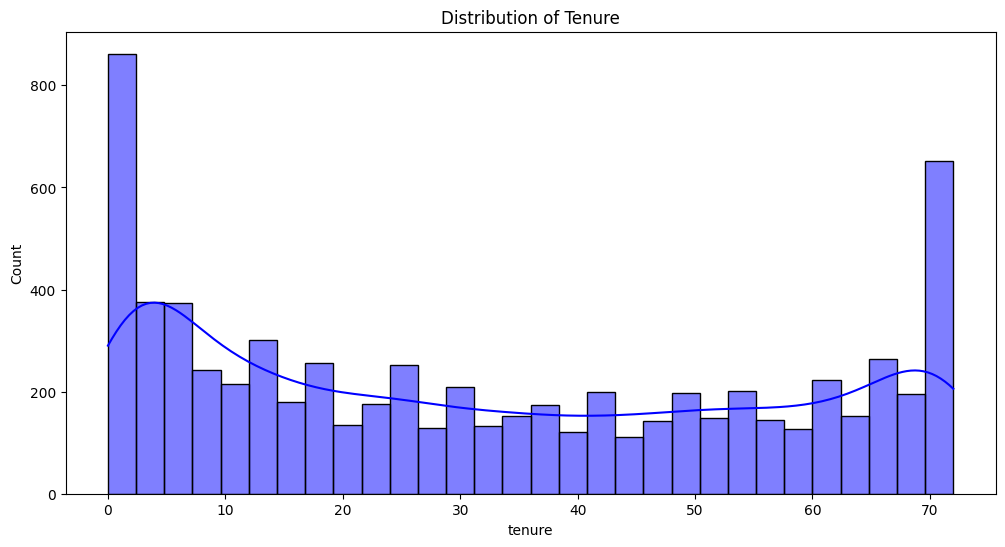

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(data['tenure'], kde=True, bins=30, color='blue')
plt.title('Distribution of Tenure')
plt.show()

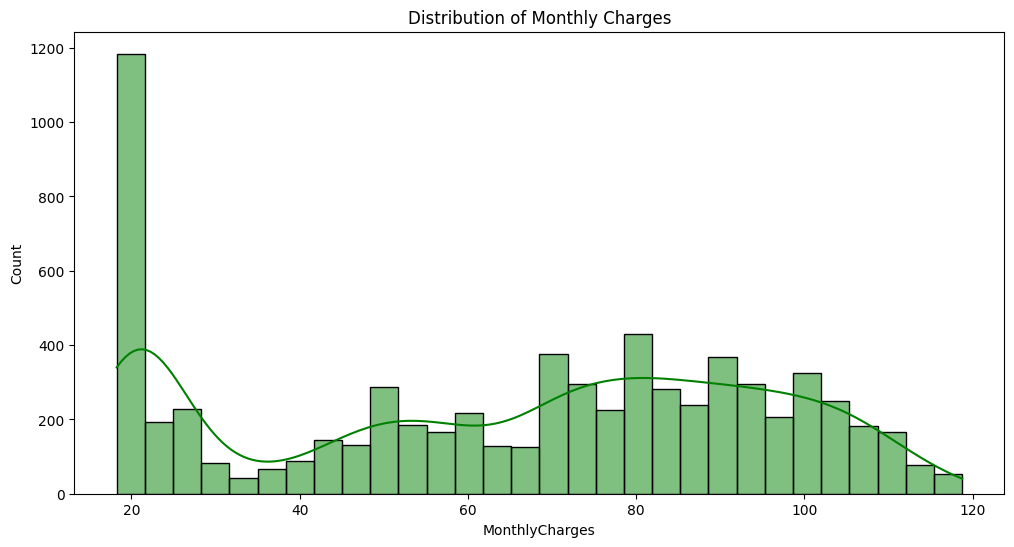

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(data['MonthlyCharges'], kde=True, bins=30, color='green')
plt.title('Distribution of Monthly Charges')
plt.show()

C:\Users\Himanshu\AppData\Local\Temp\ipykernel_19832\2224257236.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette='pastel')


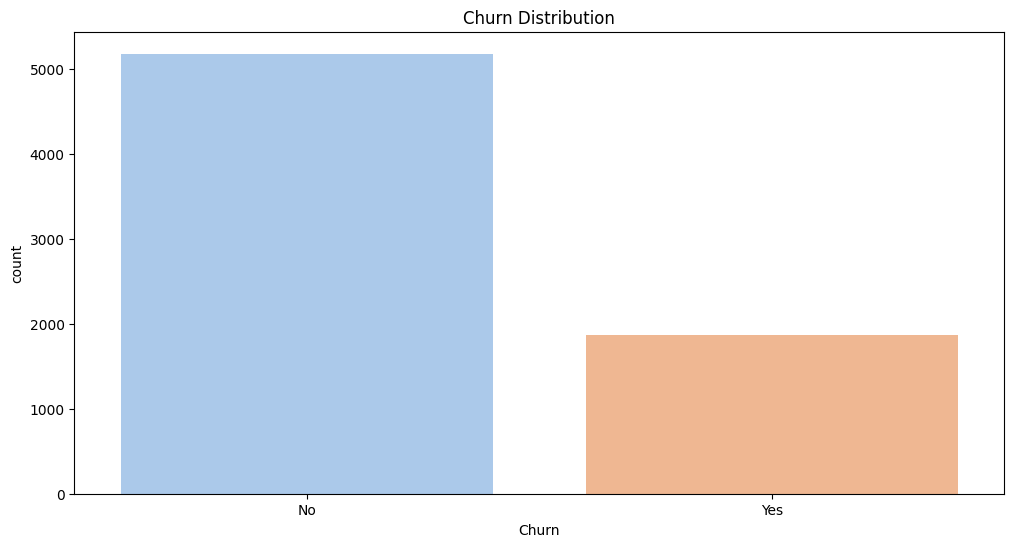

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Churn', data=data, palette='pastel')
plt.title('Churn Distribution')
plt.show()

## Univariate Analysis

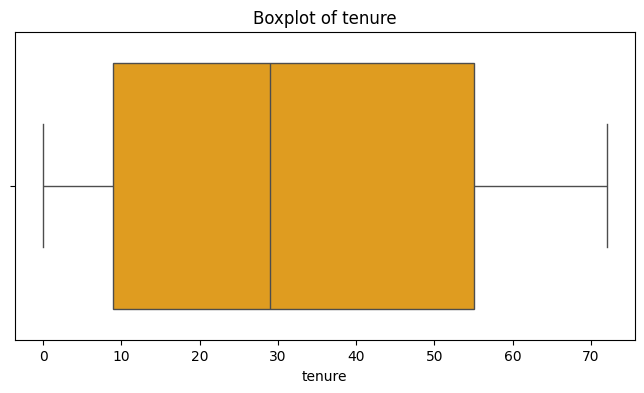

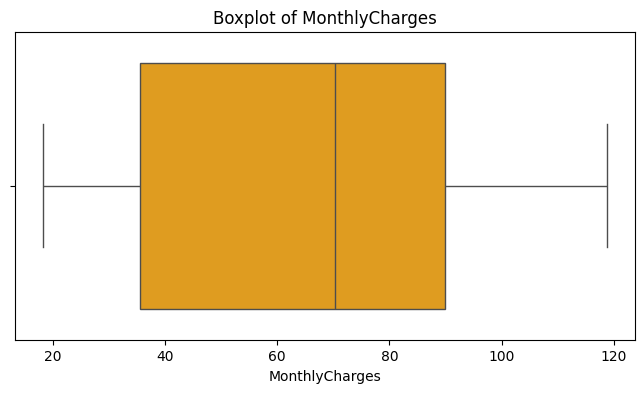

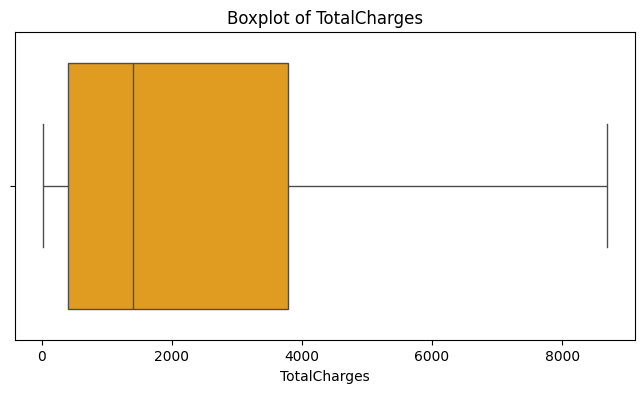

In [11]:

for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.show()

## Bivariate Analysis

C:\Users\Himanshu\AppData\Local\Temp\ipykernel_19832\482994796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='coolwarm')


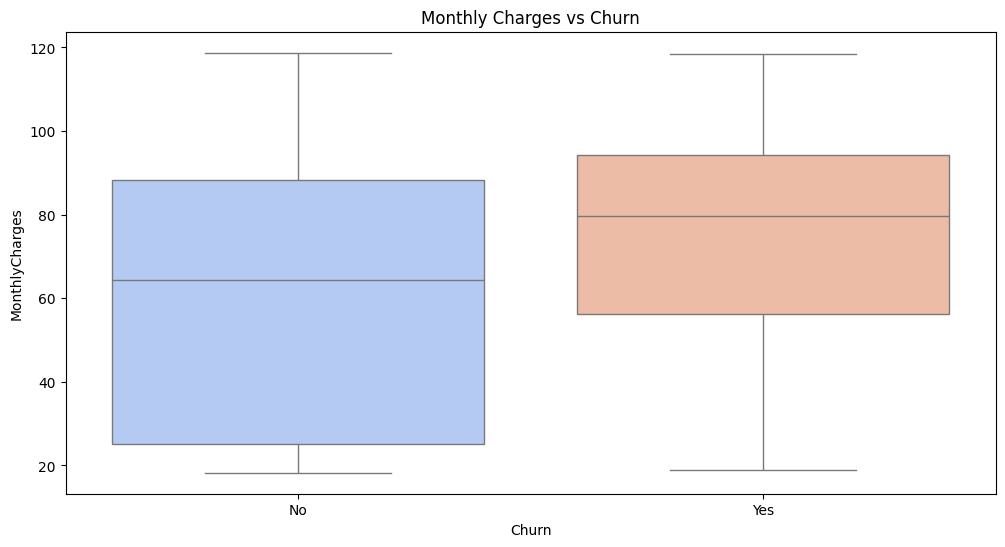

In [12]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='coolwarm')
plt.title('Monthly Charges vs Churn')
plt.show()

C:\Users\Himanshu\AppData\Local\Temp\ipykernel_36140\3685434956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=data, palette='coolwarm')


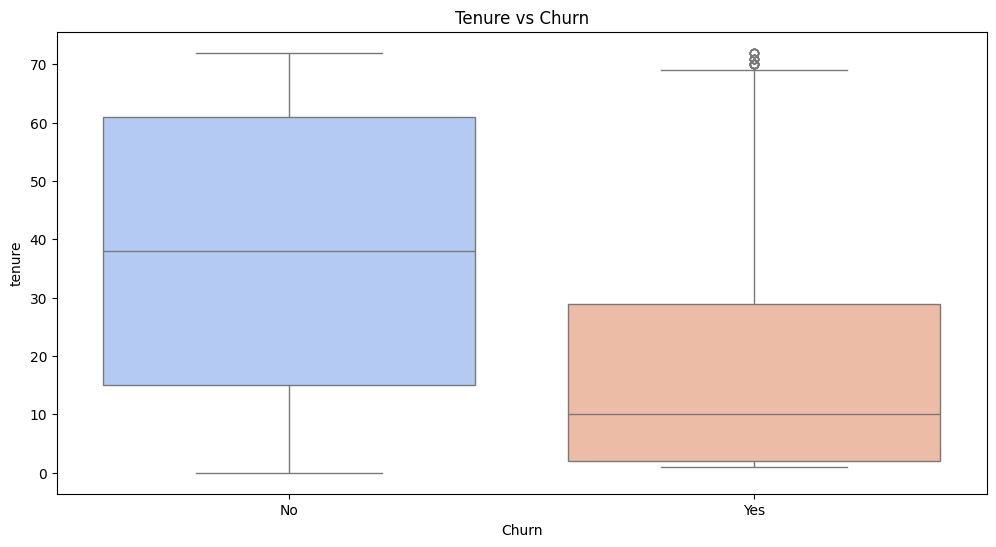

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='tenure', data=data, palette='coolwarm')
plt.title('Tenure vs Churn')
plt.show()

## Handle Outliers using Z-score

In [77]:

num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
data = data[(zscore(data[num_features]) < 3).all(axis=1)]


In [78]:
# Encode Categorical Features using Label Encoding
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                    'PaymentMethod']

In [79]:
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [80]:
# One-hot encode 'Churn'
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [81]:
# Split the Dataset into Features and Target Variable
X = data.drop('Churn', axis=1)
y = data['Churn']

In [82]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Feature Scaling

In [83]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [85]:

# Predictions on test set
y_pred = model.predict(X_test_scaled)


In [86]:
# Performance evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1410  129]
 [ 293  281]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1539
           1       0.69      0.49      0.57       574

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [87]:
# ROC-AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 0.8373542256725826


In [24]:
# Save output directory
output_path = '../output'
os.makedirs(output_path, exist_ok=True)

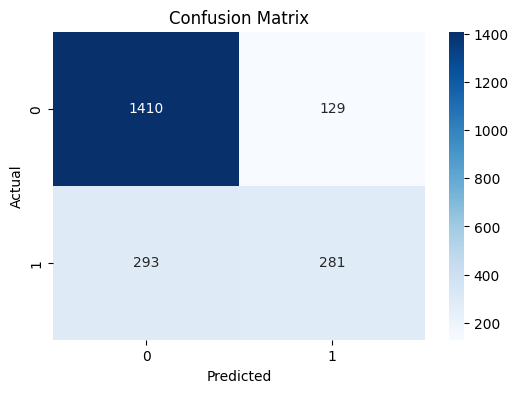

In [25]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig(os.path.join(output_path, 'confusion_matrix.png'))
plt.show()

In [26]:
# Save Model Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

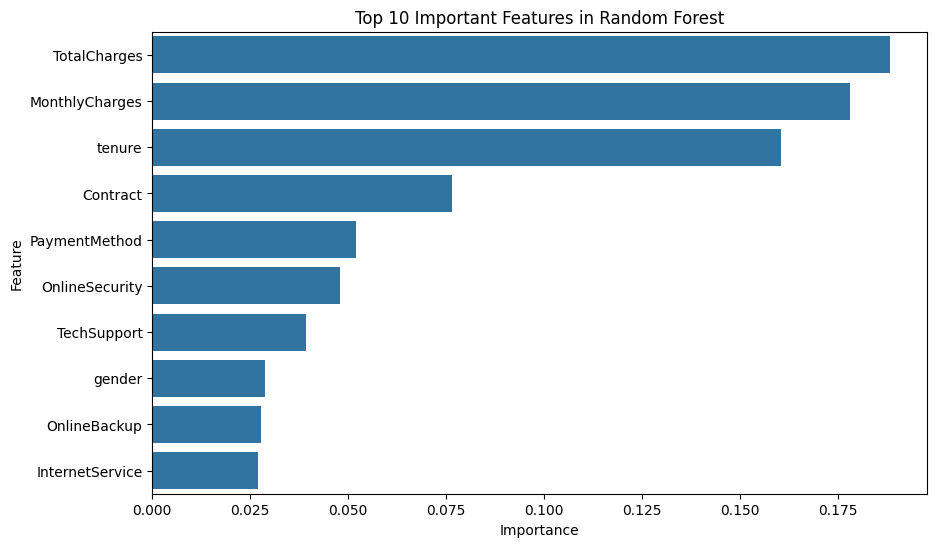

In [27]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features in Random Forest')
plt.savefig(os.path.join(output_path, 'feature_importance.png'))
plt.show()

In [28]:
print("Feature Importance:")
print(feature_importance_df.head(10))

Feature Importance:
            Feature  Importance
18     TotalCharges    0.188429
17   MonthlyCharges    0.178128
4            tenure    0.160567
14         Contract    0.076544
16    PaymentMethod    0.051907
8    OnlineSecurity    0.047949
11      TechSupport    0.039272
0            gender    0.028697
9      OnlineBackup    0.027728
7   InternetService    0.026884


In [29]:
# Check for Overfitting
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
if train_accuracy > test_accuracy:
    print("Warning: The model might be overfitting.")

Training Accuracy: 0.9984
Test Accuracy: 0.8003


In [30]:
# Cross-Validation to Validate Performance
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Accuracy Scores: [0.79411765 0.79817444 0.79107505 0.78498986 0.78093306]
Mean Cross-Validation Accuracy: 0.7899


## Analyis : 
model shows overfitting because the training accuracy (99.84%) is significantly higher than the test accuracy (80.03%). This means your model is memorizing the training data instead of generalizing well to unseen data.

In [69]:
## Try Random forestr tuned version

In [88]:
# Train a Regularized Random Forest Model
model = RandomForestClassifier(
    n_estimators=100,      # Reduce the number of trees
    max_depth=10,          # Limit depth to prevent overfitting
    min_samples_split=5,   # Require at least 5 samples to split
    min_samples_leaf=2,    # Require at least 2 samples at leaf nodes
    random_state=42
)



In [89]:

model.fit(X_train_scaled, y_train)




RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [90]:
# Evaluate again
y_pred = model.predict(X_test_scaled)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])


In [91]:
print("New Model Performance:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'New ROC-AUC Score: {roc_auc:.4f}')

New Model Performance:
[[1401  138]
 [ 285  289]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.68      0.50      0.58       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

New ROC-AUC Score: 0.8550


In [74]:
## Gradient Boosting

In [92]:
# Train a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.05,  # Reduce learning rate for better generalization
    max_depth=5,
    random_state=42
)

In [93]:
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
roc_auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test_scaled)[:, 1])

In [94]:
print("Gradient Boosting Performance:")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print(f'Gradient Boosting ROC-AUC Score: {roc_auc_gb:.4f}')

Gradient Boosting Performance:
[[1389  150]
 [ 270  304]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.67      0.53      0.59       574

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Gradient Boosting ROC-AUC Score: 0.8534


## Fine-Tune Hyperparameters for XGBoost

In [95]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,      # More trees for better learning
    learning_rate=0.03,    # Lower learning rate for better generalization
    max_depth=5,           # Limit depth
    subsample=0.8,         # Prevent overfitting by training on 80% of data
    colsample_bytree=0.8,  # Use only 80% of features per tree
    random_state=42
)

In [96]:
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])

In [97]:
print("XGBoost Performance:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(f'XGBoost ROC-AUC Score: {roc_auc_xgb:.4f}')

XGBoost Performance:
[[1400  139]
 [ 268  306]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.69      0.53      0.60       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113

XGBoost ROC-AUC Score: 0.8557


##  Feature Selection to Remove Noise

In [41]:
# Keep only important features
important_features = ['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract', 'PaymentMethod', 'OnlineSecurity']
X_selected = X[important_features]

In [42]:
# Split the dataset again
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.3, random_state=42)


In [43]:
# Feature Scaling
X_train_sel_scaled = scaler.fit_transform(X_train_sel)
X_test_sel_scaled = scaler.transform(X_test_sel)

In [44]:

# Train the XGBoost model on selected features
xgb_model.fit(X_train_sel_scaled, y_train_sel)
y_pred_xgb_sel = xgb_model.predict(X_test_sel_scaled)
roc_auc_xgb_sel = roc_auc_score(y_test_sel, xgb_model.predict_proba(X_test_sel_scaled)[:, 1])


In [45]:
print("XGBoost with Feature Selection Performance:")
print(confusion_matrix(y_test_sel, y_pred_xgb_sel))
print(classification_report(y_test_sel, y_pred_xgb_sel))
print(f'XGBoost ROC-AUC Score (Feature Selected): {roc_auc_xgb_sel:.4f}')

XGBoost with Feature Selection Performance:
[[1392  147]
 [ 278  296]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.67      0.52      0.58       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

XGBoost ROC-AUC Score (Feature Selected): 0.8501


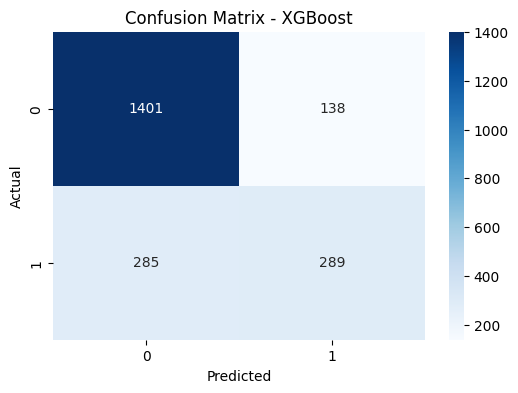

In [46]:
# Save Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig(os.path.join(output_path, 'conf_matrix_xgboost.png'))
plt.show()


In [47]:
# Save Model Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

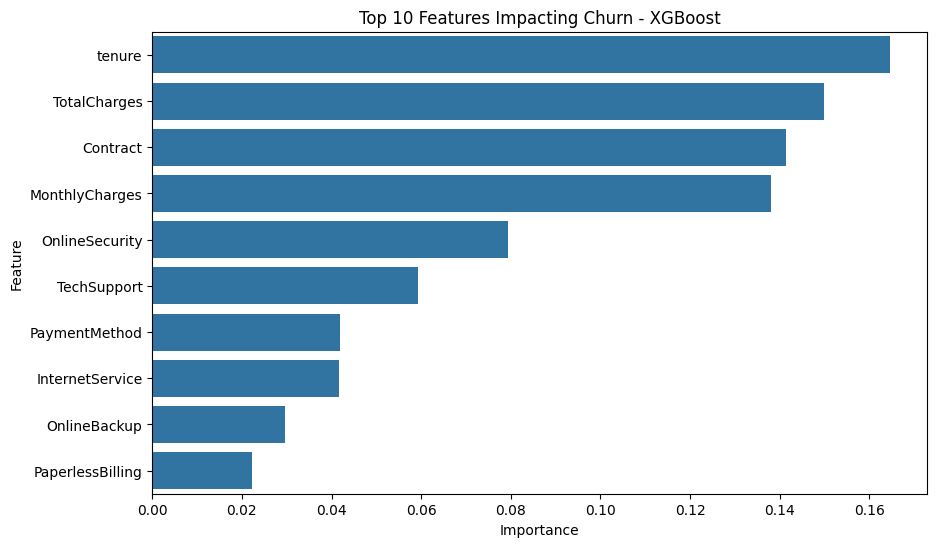

In [48]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Features Impacting Churn - XGBoost')
plt.savefig(os.path.join(output_path, 'feature_importance_xgboost.png'))
plt.show()

In [49]:
print("Feature Importance:")
print(feature_importance_df.head(10))

Feature Importance:
             Feature  Importance
4             tenure    0.164702
18      TotalCharges    0.149929
14          Contract    0.141411
17    MonthlyCharges    0.138019
8     OnlineSecurity    0.079461
11       TechSupport    0.059203
16     PaymentMethod    0.041801
7    InternetService    0.041717
9       OnlineBackup    0.029531
15  PaperlessBilling    0.022312


In [50]:
# Get probability predictions for ROC curve
y_prob = model.predict_proba(X_test_scaled)[:, 1]


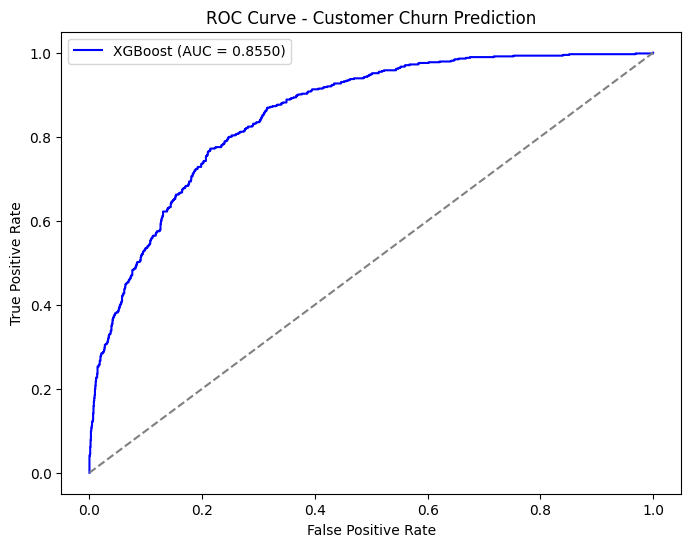

In [51]:
# Plot and Save ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Customer Churn Prediction')
plt.legend()
plt.savefig(os.path.join(output_path, 'roc_curve_xgboost.png'))
plt.show()

## Final Model Selection
Your XGBoost model performed the best with an ROC-AUC of 0.8557 and accuracy of 81%, showing slight improvement over Random Forest and Gradient Boosting.
Best Model: XGBoost (Full Features)

Accuracy: 81%
ROC-AUC Score: 0.8557
Better balance between precision and recall

## Save thje model

In [111]:
import os

# Get the absolute path of the output directory
output_path = os.path.abspath("../output/xgboost_model_v5.json")

# Save the model using the absolute path
xgb_model.save_model(output_path)

print(f"Model saved successfully at: {output_path}")


Model saved successfully at: C:\Users\Himanshu\telco-customer-churn\output\xgboost_model_v5.json
